<a href="https://colab.research.google.com/github/Mandloi1/projectwork/blob/master/clustering_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [96]:
data = pd.read_csv('Sample_data.csv')

In [97]:
data = data.dropna()
data.shape

(399, 14)

In [98]:
data= data.drop(['PART#', 'DPERP', 'Mg', 'Al', 'Class'], axis = 1)
data

,X_FERET,Y_FERET,DAVE,DMAX,DMIN,ASPECT,AREA,PERIMETER,Mg/Al
0,2.99990,3.58322,3.29594,3.76466,2.58417,1.45682,6.98565,12.001600,0.325709
1,2.33326,2.08327,2.27187,2.66788,1.48360,1.79825,2.77760,7.742380,0.375406
2,7.83308,6.83311,7.25698,7.81399,6.81158,1.14716,34.69220,29.452801,0.392320
3,1.83327,1.74994,1.73706,1.79886,1.73710,1.03556,2.20124,6.644780,0.329927
4,7.33309,8.41639,8.39133,8.94592,5.48010,1.63244,35.86570,34.866798,0.335254
...,...,...,...,...,...,...,...,...,...
440,2.91657,2.91657,2.88842,3.16766,2.68319,1.18056,6.08988,11.335000,0.353107
441,1.83327,2.66658,2.35166,2.68991,1.23653,2.17537,2.80537,7.791190,0.350002
442,1.58328,1.66661,1.61402,1.76771,1.35524,1.30435,1.77766,6.055550,0.322826
443,3.74988,4.49985,4.23152,4.74472,3.50952,1.35196,12.02000,16.085800,0.358899


In [99]:
X = data
X.shape
X.describe()

,X_FERET,Y_FERET,DAVE,DMAX,DMIN,ASPECT,AREA,PERIMETER,Mg/Al
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,3.578204,3.659654,3.798562,4.191297,2.825518,1.539793,9.117169,14.351655,0.317890
std,1.644166,1.543498,1.695209,1.859606,1.203914,0.529300,7.358027,7.091158,0.156374
min,1.249960,1.249960,1.274790,1.455310,0.668402,1.006800,1.034650,5.132990,0.000000
25%,2.333260,2.583250,2.524820,2.810465,1.941965,1.203215,3.885165,9.304715,0.313304
50%,3.166560,3.333220,3.388900,3.731310,2.612960,1.368420,6.700950,12.542000,0.347234
75%,4.333190,4.333190,4.593020,5.005735,3.432875,1.700440,12.127650,17.307200,0.367576
max,10.666300,9.916340,9.999340,11.090000,9.951870,4.599440,57.927700,56.181301,2.022765


In [100]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
x_after_min_max_scaler = min_max_scaler.fit_transform(X) 
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler)


After min max Scaling : 
 [[0.1858408  0.26923122 0.23166236 ... 0.10459977 0.13455118 0.16102189]
 [0.11504471 0.09615435 0.11428439 ... 0.03063555 0.05111609 0.18559047]
 [0.69911664 0.64423092 0.68567317 ... 0.59159334 0.47640775 0.19395246]
 ...
 [0.03539804 0.0480766  0.03888223 ... 0.01305977 0.0180723  0.15959653]
 [0.26548746 0.3749997  0.33889772 ... 0.19308774 0.21455774 0.17743001]
 [0.15929227 0.20192285 0.19500375 ... 0.09129603 0.11918338 0.18402583]]


In [101]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

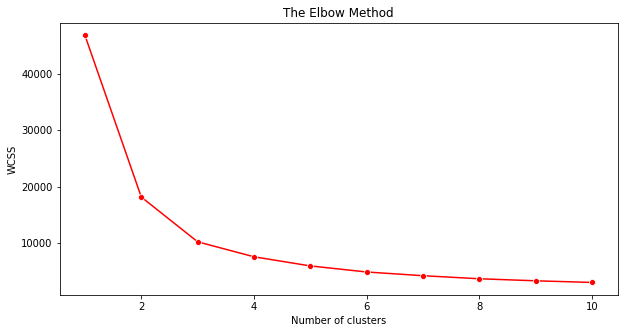

In [102]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

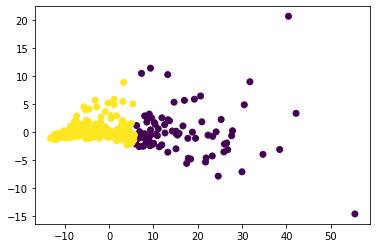

In [107]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pylab as pl
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)
#pl.figure('Reference Plot')
#pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c='black')
kmeans = KMeans(n_clusters=2, random_state=111)
kmeans.fit(X)
pl.figure('K-means with 2 clusters')
pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
#pl.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
pl.show()